
# Práctica 2: Metaheurísticas basadas en trayectorias: Tabu Search

<center><h3>
    Nerea Freiría Alonso
</h3></center>


# Instrucciones

Igual que en la Práctica 1, utilizaremos un **Jupyter Notebook** para la resolución de esta práctica.

Como ya sabéis, nos permite ir ejecutando celdas de código poco a poco, así como generar automáticamente un informe bien formateado de la práctica. Aun así, a continuación tenéis unas breves instrucciones sobre como funciona:

* Puedes añadir una celda con el botón **"Insert"** de la barra de herramentas, y cambiar su tipo con **"Cell > Cell Type"**
* Para ejecutar una celda de código, la seleccionaremos y pulsaremos el botón **"▶ Run"** de la barra de herramentas.
* Para pasar el documento a HTML, seleccionaremos **"File > Download as > HTML (.html)"**

Sigue este guión hasta el final. Ejecuta el código proporcionado paso a paso comprendiendo lo que estás haciendo y reflexionando sobre los resultados. Habrá preguntas intercaladas a lo largo del guión, responde a todas ellas en la sección reservada para ese fin: **"Respuestas a los cuestionarios"**. Por favor, no modifiques ninguna linea de código excepto cuando se te pida explícitamente.

No olvides insertar tu **nombre y apellidos** en la celda superior.

IMPORTANTE: Se te pedirán dos implementaciones del algoritmo de Búsqueda Tabú, una primera implementación obligatoria y una implementación mejorada optativa. Escribe el código de tu o tus soluciones en las celdas que se indican para ello. Además, a lo largo de la práctica se plantearán varias preguntas que debéis responder en la parte inferior del documento, incluyendo las celdas que veáis necesarias (si hacéis referencia a partes concretas de vuestro código, etc) para reponder a ellas.

## Entrega de la práctica

La fecha límite de entrega será la indicada en el Campus Virtual. La entrega consistirá de un único archivo comprimido con nombre `APELIDOS_NOME_BusquedaTabu.zip` que contenga los seguientes ficheros:

 * `APELIDOS_NOME_BusquedaTabu.html`: Archivo HTML fruto de la exportación del presente Notebook, con las preguntas respondidas al final del documento.
 * `APELIDOS_NOME_BusquedaTabu.ipynb`: Archivo fuente Jupyter Notebook.
 * Archivo de datos de los problema utilizados en la resolución.
 
 ---


# Preliminares adicionales sobre Python

Además de lo visto en las prácticas anteriores, conviene familiarizarse con algunas funciones disponibles en Python que pueden resultarte útiles más adelante en la realización de esta práctica y en el uso del lenguaje en general.


Por ejemplo, cuando necesitas consultar documentación sobre paquetes Python, conviene que conozcas la versión que estás utilizando en tu entorno para poder encontrar las especificidades de cada *release*. Fíjate que en la sección *Docs by version* de la web https://docs.python.org/3/ puedes seleccionar los documentos de referencia de la versión.

Para averiguar la versión que está ejecutando este Jupyter Noteboook puedes emplear las siguientes líneas.

In [1]:
from platform import python_version

print(python_version())


3.9.7


Un paquete interesante puede ser statistics. Conociendo la versión, puedes puedes consultar la documentación y la lista completa de funciones disponibles: https://docs.python.org/3/library/statistics.html

A modo ilustrativo, puedes obtener estadísticos sobre series de datos de la siguiente forma.


In [2]:
import statistics

# ejemplo de obtención de medias y desviaciones típicas
listav = [1, 2, 3, 4, 5]
media = statistics.mean(listav)
desvtip = statistics.stdev(listav)
print(media, desvtip)

listav = [1.0, 2.5, 3.75, 4.25, 5]
media = statistics.mean(listav)
desvtip = statistics.stdev(listav)
print(media, desvtip)


3 1.5811388300841898
3.3 1.5751984002023365


Otro paquete que puede resultarte útil a la hora de crear un informe o documentar tu práctica puede ser `matplotlib.pyplot`, que permite hacer gráficas de manera integrada en el propio Notebook. Puedes consultar sus capacidades en https://matplotlib.org/stable/gallery/index.html

Veámos un ejemplo ilustrativo.

<IPython.core.display.Javascript object>


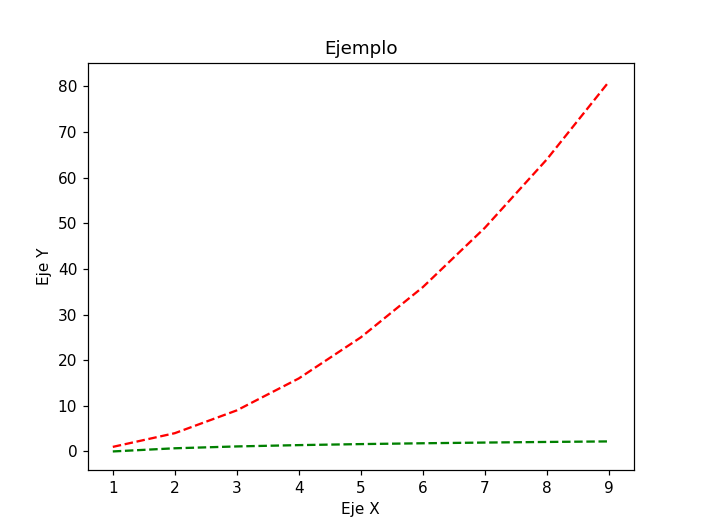

In [3]:
# Indicamos al Notebook que queremos figuras interactivas (esto sólo es necesario hacerlo una vez)
%matplotlib notebook

import matplotlib.pyplot as plt  # Importamos la librería (esto sólo es necesario hacerlo una vez)
import math

# definimos algunas líneas de tendencia arbitrarias
vectorx = [x for x in range (1,10)]
vectorlogy = [ math.log(i) for i in vectorx ]
vectorpowy = [ math.pow(i, 2) for i in vectorx ]

fig = plt.figure()  # Creamos una figura (contenedor para elementos a dibujar)
ax = fig.add_subplot(111, projection='rectilinear')  # añadimos subplot-canvas a la figura (contiene los elementos del dibujo)
 
# añadimos los plots
ax.plot(vectorx, vectorlogy, '--', color="green")
ax.plot(vectorx, vectorpowy, '--', color="red")
 
ax.set_title("Ejemplo")  # Ponemos un título
ax.set_xlabel("Eje X")  # Nombramos los ejes
ax.set_ylabel("Eje Y")
 
plt.show()  # Mostramos a figura por pantalla, que se corresponde con la fig creada arriba

---

# El Problema del Viajante de Comercio (VC) con Búsqueda Tabú

De nuevo, trataremos de resolver el problema del Viajante de Comercio, pero ahora con el algoritmo de Búsqueda Tabú.

El objetivo de esta práctica es modelar e implementar un agente inteligente que sea capaz de resolver el problema del VC mediante la metaheurística (MH) de Busquedá Tabú (TS, del inglés Tabu Search). Para ello, realizarás una implementación del algoritmo básico visto en la clase expositiva y valorarás si la introducción de modificaciones en el diseño del algoritmo te permite mejorar la calidad de las soluciones alcanzadas.


## Definición del problema de Viajante de Comercio (VC)



El problema del viajante de comercio (VC) es el problema de la persona que quiere vender un producto, y que para ello quiere encontrar el viaje más corto posible a través de las ciudades de los clientes, haciendo una única visita a cada una, empezando y acabando el recorrido en su propia ciudad (recorrido circular desde la ciudad inicial).
Típicamente, el problema parte de una representación mediante un grafo ponderado $G=(N, A)$, donde $N$ es el conjunto de $n=|N|$ nodos (ciudades), y siendo A el conjunto de arcos conectando los nodos. Cada arco $(i, j) ∈ A$ tiene asignado un peso $d_ij$ que representa la distancia entre las ciudades $i$ y $j$.
El VC se reduce al problema de crear el circuito Hamiltoniano de longitud mínima sobre el grafo $G$. La solución a una instancia del problema del VC puede representarse como una permutación de los índices de las ciudades, donde lo importante es el orden de visita, que determinará el coste del viaje en términos de la distancia recorrida total. 
De este modo, el problema pertenece a la categoría de problemas NP, pues puede haber n permutaciones que se corresponden al espacio de búsqueda posible. Esto hace que resolver instancias de problemas con muchas ciudades (n grande) haga el problema impracticable con estrategias de búsqueda no-informadas y éste pueda beneficiarse de ciertas metaheurísticas, pudiendo abordar de problemas con tallas más grande a la vez que se obtienen soluciones razonablemente buenas.


### Nociones previas

Para facilitar vuestra labor de implementación, os proporcionamos la clase `Localizaciones`, que permite cargar las localizaciones GPS que representan los vértices del grafo G de N ciudades, y permite calcular de manera transparente la distancia entre cualquier par de ciudades usando la [fórmula del semiverseno]( https://es.wikipedia.org/wiki/F%C3%B3rmula_del_semiverseno), que sirve para calcular las distancias teniendo en cuenta la curvatura de la Tierra. 
Es importante tener en cuenta que en la fórmula del semiverseno las coordenadas se expresan en radianes.


En primer lugar importa el módulo Python que acompaña esta práctica, que trae alguna función de apoyo implementada así como la clase de carga de datos.

In [4]:
from helpers_mod_sa import *

Inspecciona el código de carga de localizaciones mediante `psource(Localizaciones)`

In [5]:
psource (Localizaciones)

Fíjate que por defecto se carga el fichero `./data/grafo8cidades.txt`, que contiene las coordenadas GPS de 8 ciudades gallegas, siendo Santiago de Compostela la primera de ellas. La primera línea de estos ficheros indica el número de ciudades n, mientras que cada una de las líneas sucesivas especifican las coordenadas de cada ciudad, especificadas como coordenadas GPS (latitud y longitud en grados).

Puedes cargar otro fichero haciendo uso del parámetro `filename` como se muestra a continuación. Si todo va bien, la primera distancia entre la ciudad 0 y 1 debe ser unos 55 km.

❗ Para esta práctica, **debéis utilizar** el fichero `./data/grafo100cidades.txt` que contiene las coordenadas de 100 concellos gallegos.

In [6]:
g1=Localizaciones(filename='./data/grafo8cidades.txt')

g3=Localizaciones(filename='./data/grafo100cidades.txt')
print(g3.distancia(0,1))
g4=Localizaciones(filename='./data/US120.txt')

68.81748609463234


In [7]:
from itertools import combinations
solucion=[x for x in range(1,g3.nciudades+1)]
print(solucion)
print(list(combinations(solucion, g3.nciudades)))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100)]



## P2.1: Implementación básica de Búsqueda Tabú (obligatorio 6pts)


IMPLEMENTACIÓN DE BÚSQUEDA TABÚ


En este apartado debes desarrollar una **versión básica del algoritmo de Búsqueda Tabú que resuelva el problema del viajante de comercio (TSP)** aplicado a los concellos de Galicia. La especificación del algoritmo será muy detallada, ya que el objetivo principal de esta primera parte es que dispongas de una implementación totalmente funcional y verificada que resuelva el problema correctamente.
Igual que en la práctica anterior (P1), consideramos que el recorrido es circular (empieza y termina en el mismo concello) y que tienen que pasar por N=100 concellos de Galicia. Implementa el algoritmo básico de Búsqueda Tabú para resolver el problema del VC enunciado arriba. Para ello, revisa la descripción algorítmica de la MH vista en la clase expositiva.

Ten en cuenta las **siguientes consideraciones** de diseño para completar la implementación básica:
- **Representación  de  las  soluciones:**  representación  de  orden  (permutaciones)  **comenzando y finalizando en la ciudad 0**. Es decir, utilizamos una representación de orden formada por una secuencia de valores numéricos que representan cada uno de los concellos {0, 1, ..., 99}. Consideramos siempre como punto de partida y retorno el concello 0, por lo que efectivamente una solución *S* se representa como una permutación de los demás valores {1, ..., 99}. 


- **Solución inicial:** generación **totalmente aleatoria** de una permutación válida como está explicado en los apartados previos. 
❗  **NOTA: Es importante que la generación de la solución inicial se implemente en una función propia y que después, esta solución inicial se pase a la función que implementa el algoritmo de búsqueda tabú *per se*.**


- **Operador  de  generación de vecindario de una solución** (generación de la solución  siguiente  Scand  a  partir  de  la  actual  Sact): Se utilizará el operador  de  intercambio y se generarán todos los posibles intercambios. Es decir, con este operador, el número máximo de vecinos diferentes que se puede generar a partir de una solución dada (todos los posibles intercambios) es:

    $$ \sum_{i=1}^{L-1}i = \frac{L(L-1)}{2} $$

    donde L es la longitud de la solución y se ha tenido en cuenta que es lo mismo intercambiar los vecinos *i,j* que *j,i*.

❗  **NOTA: Es importante que la generación del vecindario de una solución se implemente en una función propia y que después, el vecino seleccionado, se pase a la función que implementa el algoritmo de búsqueda tabú *per se*.**



- **Función de coste:** suma de las distancias del camino según el orden del recorrido teniendo en cuenta que se parte de y se llega al concello 0.  La distancia se calcula teniendo en cuenta los siguientes tres elementos:
    - Distancia desde el concello 0 al primer concello de la solución: 0 -> S[0]
    - Distancia recorrida en la solución: S[0] -> S[1] -> ... -> S[-1]
    - Distancia recorrida desde el concello final al concello 0: S[-1] ->0
    


- **Lista Tabú:** La lista tabú (LT) estará formada por los **movimientos de intercambio de índices** {i,j} que den lugar a las soluciones que forman la trayectoria de búsqueda. Tenéis que establecer **N=100** como parámetro de tenencia tabú, esto es, el tamaño de la lista tabú será de **N** elementos, de forma que un movimiento {i,j} saldrá de la lista tabú después de **N=100** operaciones y volverá a estar permitido.


- **Reinicialización:** En el caso de que transcurran **1000 iteraciones consecutivas** sin que mejore la solución óptima $S_{opt}$ alcanzada hasta el momento, se hará una reinicialización desde ella: $S_{opt}$. Se trata por tanto de una estrategia de reinicialización por **intensificación**. En el reinicio **no se restaura la lista tabú**, para dar opción a visitar vecinos no visitados anteriormente ya que determinados intercambios prohibidos al estar incluidos en la lista tabú. Es decir, cuando se hace un reinicio, se vuelve a la solución $S_{opt}$ y **se vacía la lista tabú.**


- **Criterio de parada:** Se finaliza la ejecución cuando se alcanzan **10.000 iteraciones** del algoritmo.



### Preguntas sobre la práctica obligatoria (se responde al final del notebook)

❓ **Pregunta 1**. Explica brevemente los detalles relevantes de tu código para entender tu implementación (p.ej., estructura de tu código, funciones, etc.)

❓ **Pregunta 2**. La parte experimental de la práctica consiste en realizar **10 ejecuciones diferentes** de la implementación realizada y reportar:
- **Media y desviación** estándar de la mejor solución obtenida.
- El **número de iteración** en el que se obtuvo la mejor solución (por lo que debéis mantener además de la solución óptima hasta el momento $S_opt$, la iteración en la que se obtiene). 
- El **tiempo de ejecución** del algoritmo (en las nociones previas se explica cómo hacer esto).

 
## P2.2: Mejoras del algoritmo de Búsqueda Tabú (No obligatorio 4pts)
En este apartado el objetivo es aplicar la resolución del problema que acabáis de programar a un nuevo conjunto de 120 localiszaciones tomadas del archivo de [50.000 lugares históricos del Registro Nacional de los EE.UU](http://www.math.uwaterloo.ca/tsp/us/data.html), tal y como se describe en la web del [Traveller Salesman Problem (TSP)](http://www.math.uwaterloo.ca/tsp/) del [Department of Combinatorics and Optimization](https://uwaterloo.ca/combinatorics-and-optimization/) de la University of Waterloo CA [(Prof. William Cook)](http://www.math.uwaterloo.ca/~bico/).
Para evitar problemas de tiempo excesivo de cómputo, reduciremos el problema a 120 localizaciones que se indican en el fichero **US120.txt**.

**NOTA:** Si alguno de vosotros quiere realizar pruebas con todos los lugares indicados, puede obtener el fichero de texto original en el [siguiente enlace](http://www.math.uwaterloo.ca/tsp/us/files/us50000_latlong.txt).


En esta sección el objetivo es realizar mejoras al algoritmo desarrollado previamente, de acuerdo a lo visto en las clases expositivas. Podrá modificarse cualquier parámetro u operador, como por ejemplo:
- **Generación de la solución inicial** (inicialización greedy, ...)
- **Gestión de la lista tabú** con la inclusión de algún criterio de aspiración (por ejemplo excluir de la lista una solución si mejora a la mejor solución hasta el momento)
- El **operador de generación de vecinos** (por ejemplo no considerar todos los pares de índices, cambiar el operador de generación, ...)
- Utilizar **otras estrategias de reinicialización** por intensificación (por ejemplo reiniciar desde una solución aleatoria de un conjunto de las N mejores soluciones hasta ahora, restaurar la lista tabú, ...).
- Cambiar la **estrategia de reinicialización para dar diversificación** con una estrategia de **memoria a largo plazo**. Como puede ser utilizar una matriz simétriza *frec* que almacene elnúmero de veces que cada par de ciudades han sido consecutivas en las soluciones aceptadas hasta el momento. Con esta matriz de frecuencias se podría realizar una inicialización voraz sobre una matriz de distancias modificada que incluya las frecuencias almacenadas en memoria y penalice los pares de ciudads con mayor frecuencia, incrementando ficticiamente su distancia:

$$ D(i,j)_{MOD} = D(i,j) + \mu (D_{MAX} - D_{min}) \frac{frec(i,j)}{frec_{MAX}} $$

- Utilizar un criterio de **oscilación estratégica** que alterne entre las estrategias de intensificación y diversificación**-

### Preguntas sobre la práctica optativa (se responde al final del notebook)

❓ **Pregunta 3**. ¿Qué intervenciones de mejora te ha llevado a mejores resultados? Explica brevemente las mejoras o intervenciones de mejora realizadas, cómo la has implementado, porqué las consideras buenas para el problema y presenta tus conclusiones acompañadas de los resultados obtenidos.


---

# Respuestas a las preguntas

**Recordatorio:** No olvides escribir tu nombre y apellidos en la segunda celda de este documento.
La respuestas a las preguntas deben venir acompañadas de las implementaciones necesarias para su respuesta.

## P2.1 Especificación obligatoria

Esta primera parte se evalúa con 6 puntos. Para ello, es necesaria **realizar la implementación del algoritmo** y **responder a las preguntas 1 y 2** respetivamente. El conjunto de la implementación y las dos preguntas es lo que se evaluará en esta primera parte.

### **Pregunta 1** 

Explica brevemente los detalles relevantes de tu código para entender tu implementación (p.ej., estructura de tu código, funciones, etc.)

*Incluye todas las celdas que consideres oportunas para que sea legible y fácil de seguir.*


## Código

In [8]:
import random
#función de cálculo del coste inicial puesto que no se puede calcular mediante la del vecino (no hay vecino)
def coste_inicial(solucion, g):
    coste=0
    solucion_aux=[0]+solucion+[0]
    for i in range(len(solucion_aux)-1):
        coste+=g.distancia(solucion_aux[i],solucion_aux[i+1])
    return coste

In [9]:
def coste(coste, vec, sol_act, i,j, g):
    sol_act_aux=[0]+sol_act+[0]
    vec_aux=[0]+vec+[0]
    i+=1
    j+=1
    diferencia=g.distancia(sol_act_aux[i-1],sol_act_aux[i])+g.distancia(sol_act_aux[i],sol_act_aux[i+1])
    suma=g.distancia(vec_aux[i-1],vec_aux[i])+g.distancia(vec_aux[i],vec_aux[i+1])
    diferencia+=g.distancia(sol_act_aux[j],sol_act_aux[j+1])+g.distancia(sol_act_aux[j-1],sol_act_aux[j])
    suma+=g.distancia(vec_aux[j],vec_aux[j+1])+g.distancia(vec_aux[j-1],vec_aux[j])
    return coste-diferencia+suma
    

In [10]:
def genera_solucion_inicial(g):
    #generamos una solucion inicial aleatoria sin incluir la ciudad 0 ya que es la de partida y llegada
    solucion=[x for x in range(1,g.nciudades)]
    #desordenamos la solucion
    random.shuffle(solucion)
    return solucion

In [11]:
def genera_vecindario(solucion, g, tabu):
    mejor_vecino=[[],math.inf]
    mejor_mov=[]
    #generamos los vecinos
    vecinos=[]
    #primero generamos los movimientos posibles
    movimientos=[]
    #generamos los movimientos posibles

    for i in range(0,len(solucion[0])-1):
        for j in range(i+1,len(solucion[0])):
            if (i,j) not in tabu:                 
                movimientos.append((i,j))
                
                #creamos una copia de la solucion actual para poder modificarla
                vecino=solucion[0].copy()
                #intercambiamos las ciudades
                vecino[i],vecino[j]=vecino[j],vecino[i]
                #añadimos el vecino al vector de vecinos con su movimiento

                coste_vec=coste(solucion[1],vecino,solucion[0],i,j,g)
                vecinos.append((vecino, coste_vec))
                #comprobamos si el coste del vecino es mejor que el de la solucion actual
                if coste_vec < mejor_vecino[1]:
                    #si es mejor lo guardamos
                    mejor_vecino[0]=vecino
                    mejor_vecino[1]=coste_vec
                    mejor_mov=(i,j)
  
 
    return mejor_vecino, mejor_mov, movimientos


In [12]:
def busqueda_tabu(g, nmax=10000,nren=1000,ntabu=100, sol_inicial=genera_solucion_inicial, cost_inicial=coste_inicial,generarVecinos=genera_vecindario ):
 #generamos una solucion inicial aleatoria
    solucion=sol_inicial(g)
    #calculamos el coste de la solucion inicial
    coste_solucion=cost_inicial(solucion,g)
    parSolucion=[solucion,coste_solucion]
    parSolucionAct=parSolucion
    mejor_mov=[]
    #creamos la lista tabu
    tabu=[]
    # contador para el numero de iteraciones
    iteracion=0
    #creamios un int para almacenar la iteración en la ue se encontro la mejor solucion
    mejor_iteracion=0
    #creamos datos para almacenar la información del mejor vecino
    iteracion=0
    i=0
    
    #creamos un bucle para que se repita hasta que se alcance el numero maximo de iteraciones
    while(iteracion < nmax):
       
        print("%-*d %%" % (3, iteracion*100/nmax), end='\r', flush=True)
        
        aux =generarVecinos(parSolucionAct,g,tabu)
        mejor_vecino=aux[0]
        mejor_mov=aux[1]
        parSolucionAct=mejor_vecino
       
        #comprobamos si el mejor vecino es mejor que la solucion actual
        if mejor_vecino[1] <coste_solucion:
            solucion=mejor_vecino[0]
            coste_solucion=mejor_vecino[1]
            parSolucion=[solucion,coste_solucion]
           
            #reiniciamos el contador de iteraciones
            i=0
            mejor_iteracion=iteracion
        else:
            i+=1

        #añaadimos el movimiento a la lista tabu
        tabu.append(mejor_mov) 
        #comprobamos si la lista tabu tiene mas elementos de los permitidos
        if len(tabu)>ntabu:
            #si es asi eliminamos el primero
            tabu.pop(0)
         
        #incrementamos el contador de iteraciones
        
        #si el contador de iteraciones es igual al numero maximo de iteraciones reiniciamos la lista tabu
        if i==nren:
            tabu=[]
            i=0
            parSolucionAct=parSolucion
            
        iteracion+=1
    return parSolucion, mejor_iteracion

**EXPLICACIÓN**

El código se estructura en 5 funciones principales:
* coste_inicial: sirve para calcular el coste de una solución sin saber una previa, se utilizará solo al inicio de la búsqueda tabú
* coste: función que calcula el coste de una solución dado el valor de su vecina. Restando y sumando los caminos diferentes ya que solo dos posiciones van a estar intercaladas.
* genera_solucion_inicial: genera una solución inicial ramdom
* genera_vecindario: genera todos los posibles vecinos y devuelve el de menor coste
* busqueda_tabu: algoritmo de tabú principal.

###  **Pregunta 2**

La parte experimental de la práctica consiste en realizar **10 ejecuciones diferentes** de la implementación realizada y reportar:
- **Media y desviación** estándar de la mejor solución obtenida.
- El **número de iteración** en el que se obtuvo la mejor solución (por lo que debéis mantener además de la solución óptima hasta el momento $S_opt$, la iteración en la que se obtiene). 
- El **tiempo de ejecución** del algoritmo (en las nociones previas se explica cómo hacer esto).

*Incluye todas las celdas que consideres oportunas para que sea legible y fácil de seguir.*


In [13]:
import time
resultados=[]
tiempo=[]
for i in range(10):
    print('Ejecucion ', i, ': ')
    start_time=time.time()
    resultados.append(busqueda_tabu(g3))
    tiempo.append(time.time()-start_time)
    print('Coste: ', resultados[i][0][1])
    print('Iteracion: ', resultados[i][1])
    print('________________________________________')

costes=[]
mej_iteracion=[]
for result in resultados:
    costes.append(result[0][1])
    mej_iteracion.append(result[1])
    
print('MEDIA: ', statistics.mean(costes))
print('DESVIACION: ', statistics.stdev(costes))
print('MEJOR ITERACION: ', mej_iteracion)
print('TIEMPOS :', tiempo)

Ejecucion  0 : 
Coste:  1580.4418480848678
Iteracion:  6746
________________________________________
Ejecucion  1 : 
Coste:  1491.9377126632348
Iteracion:  6849
________________________________________
Ejecucion  2 : 
Coste:  1690.2492943558007
Iteracion:  5448
________________________________________
Ejecucion  3 : 
Coste:  1763.205612414604
Iteracion:  2949
________________________________________
Ejecucion  4 : 
Coste:  1676.9154281196027
Iteracion:  6860
________________________________________
Ejecucion  5 : 
Coste:  1522.6145780758704
Iteracion:  7495
________________________________________
Ejecucion  6 : 
Coste:  1607.0348374564094
Iteracion:  5566
________________________________________
Ejecucion  7 : 
Coste:  1740.3360210780843
Iteracion:  5245
________________________________________
Ejecucion  8 : 
Coste:  1660.2870718156225
Iteracion:  4862
________________________________________
Ejecucion  9 : 
Coste:  1797.318889563648
Iteracion:  3299
_________________________________

## P2.2 Especificación optativa (mejoras)

### **Pregunta 3** 

**¿Qué intervenciones de mejora te ha llevado a mejores resultados? Explica brevemente las mejoras o intervenciones de mejora realizadas, cómo la has implementado, porqué las consideras buenas para el problema y presenta tus conclusiones acompañadas de los resultados obtenidos.**

Las mejoras por las que se ha optado es por la de la generación inicial greedy ya que se espera que sea una de las mejores porque al iniciar en una solución mejor, teoricamente, la mejor solución global podrá ser encontrada en iteraciones más tempranas. Esto se comprobará en las celdas inferiores donde se analizarán también los resultados obtenidos.

Por otra parte, se ha decidido incluir estrategias de diversificación, concretamente en la matriz de frecuencias ya que esto permitirá explorar más espacios de búsqueda y hacer que el algoritmo no se estanque en uno de los vecindarios, ya que si encontrásemos el mejor vecino en uno, y en la siguiente ejecución no encontrase ninguno mejor el algoritmo se estancaría y no exploraría más espacio en búsqeuda de la mejor solución global. Por ello, es de esperar que la solución encontrada sea de mayor calidad, es decir, con menor coste.

A continuación añadiremos las celdas correpondientes a cada una de las mejoras siguiendo el orden e la que fueron presentadas. Además, también se realizarán 10 ejecuciones de la función básica de tabu para el archivo de las 120 ciudades de US para poder comparar los resultados obtenidos con los de las mejoras.

In [14]:
import random

In [15]:
#Los resultaods de la búsqueda tabu base:
import time
resultados=[]
tiempo=[]
for i in range(10):
    print('Ejecucion ', i, ': ')
    start_time=time.time()
    resultados.append(busqueda_tabu(g4))
    tiempo.append(time.time()-start_time)
    print('Coste: ', resultados[i][0][1])
    print('Iteracion: ', resultados[i][1])
    print('________________________________________')

costes=[]
mej_iteracion=[]
for result in resultados:
    costes.append(result[0][1])
    mej_iteracion.append(result[1])
    

    
import statistics
print('MEDIA: ', statistics.mean(costes))
print('DESVIACION: ', statistics.stdev(costes))
print('MEJOR ITERACION: ', mej_iteracion)
print('TIEMPOS :', tiempo)

Ejecucion  0 : 
Coste:  30966.538312727364
Iteracion:  2129
________________________________________
Ejecucion  1 : 
Coste:  30921.07729209569
Iteracion:  4110
________________________________________
Ejecucion  2 : 
Coste:  28896.53125847399
Iteracion:  7607
________________________________________
Ejecucion  3 : 
Coste:  30779.408502016948
Iteracion:  8844
________________________________________
Ejecucion  4 : 
Coste:  27246.703487328563
Iteracion:  5529
________________________________________
Ejecucion  5 : 
Coste:  30600.17389905015
Iteracion:  8060
________________________________________
Ejecucion  6 : 
Coste:  31444.62416754516
Iteracion:  9014
________________________________________
Ejecucion  7 : 
Coste:  31622.3141007138
Iteracion:  5875
________________________________________
Ejecucion  8 : 
Coste:  32702.78861104492
Iteracion:  4670
________________________________________
Ejecucion  9 : 
Coste:  35055.65414558109
Iteracion:  8529
_______________________________________

**SOLUCION INICIAL CON GREEDY**

In [16]:
#_____________________________FUNCION DE CALCULO DE SOL INICIAL_____________________________________________________
def genera_solucion_inicial_greedy(g):
#algoritmo voraz de generacion de solucion inicial
    solucion=[]
    #creamos una lista con los nodos del grafo
    nodos=[x for x in range(g.nciudades)]
    #añadimos el nodo inicial a la solucion
    solucion.append(nodos[0])
    #eliminamos el nodo inicial de la lista de nodos
    nodos.pop(0)
    #creamos un bucle para que se repita hasta que la lista de nodos este vacia
    while len(nodos)>0:
        #creamos una variable para almacenar el nodo mas cercano
        nodo_cercano=nodos[0]
        #creamos una variable para almacenar la distancia del nodo mas cercano
        distancia_cercana=g.distancia(solucion[-1],nodos[0])
        #creamos un bucle para recorrer la lista de nodos
        for nodo in nodos:
            #comprobamos si la distancia del nodo actual es menor que la del nodo mas cercano
            if g.distancia(solucion[-1],nodo)<distancia_cercana:
                #si es asi actualizamos la distancia mas cercana y el nodo mas cercano
                distancia_cercana=g.distancia(solucion[-1],nodo)
                nodo_cercano=nodo
        #añadimos el nodo mas cercano a la solucion
        solucion.append(nodo_cercano)
        #eliminamos el nodo mas cercano de la lista de nodos
        nodos.remove(nodo_cercano)
  
    #eliminamos el primer 0
    solucion.pop(0)

    return solucion


In [17]:
aux=busqueda_tabu(g4, sol_inicial=genera_solucion_inicial_greedy)
print(aux)

([[91, 81, 109, 119, 89, 8, 38, 40, 71, 42, 105, 36, 4, 35, 59, 16, 18, 66, 3, 53, 50, 64, 74, 37, 84, 82, 69, 83, 13, 78, 80, 114, 107, 22, 68, 100, 90, 43, 32, 51, 79, 101, 10, 77, 2, 110, 113, 14, 58, 11, 26, 24, 41, 63, 75, 62, 55, 21, 28, 93, 65, 27, 86, 47, 60, 9, 20, 111, 49, 25, 17, 34, 92, 23, 52, 117, 103, 96, 70, 73, 88, 31, 72, 54, 112, 95, 85, 33, 108, 48, 97, 57, 6, 45, 30, 44, 102, 76, 39, 29, 116, 87, 5, 118, 15, 67, 12, 115, 106, 1, 61, 98, 99, 56, 19, 104, 46, 7, 94], 25619.983016850838], 2385)


Primero se seleccionó realizar la mejora de escoger una solución inicial creada a partir de una estrategia voraz. Para generar la solución se escoge siempre la ciudad no visitada más cercana a la ciudad actual. 
Para poder comprobar la mejora con respecto al algoritmo base se han realizado 10 pruebas sobre el archivo de las 120 ciudades, de esta forma podremos tener una estimación de las soluciones. Como podemos ver en la anterior celda las respuestas obtenidas tienen una media de costo  de **31023.581377657767** y la iteración en la que se dá la mejor solución es sobre 6436. 
Si ahora pasamos a ver el resultado obtenido con la optimización de la mejora de inicialización greedy vemos que la mejor solución se dá en iteraciones más tempranas (**2385**) por lo que daría la posibilidad de reducir el número de iteraciones de tal forma que se mejoraría en gran proporción el tiempo de ejecución. Además, el resultado obtenido de la mejor solución con greedy tiene un coste menor que la media de resultados obtenidos mediante la inicialización aleatoria este se situaría alrededor de los **25620** de coste.


**INTRODUCIMOS MATRIZ DE FRECUENCIAS**

In [18]:
import numpy as np
def reinicializacion_greedy(M_frecuencia,dmax, dmin, g):
   #algoritmo voraz de generacion de solucion inicial
    solucion=[]
    #creamos una lista con los nodos del grafo
    nodos=[x for x in range(g.nciudades)]
    #añadimos el nodo inicial a la solucion
    solucion.append(nodos[0])
    #eliminamos el nodo inicial de la lista de nodos
    nodos.pop(0)
    #actualizamos el maximo de frecuencia
    max_frecuencia=np.max(np.squeeze(np.asarray(M_frecuencia)))
    #creamos un bucle para que se repita hasta que la lista de nodos este vacia
    while len(nodos)>0:
        #creamos una variable para almacenar el nodo mas cercano
        nodo_cercano=nodos[0]
        #creamos una variable para almacenar la distancia del nodo mas cercano
        distancia_cercana=g.distancia(solucion[-1],nodos[0])
        #creamos un bucle para recorrer la lista de nodos
        for nodo in nodos:
            #comprobamos si la distancia del nodo actual es menor que la del nodo mas cercano
            if (g.distancia(solucion[-1],nodo)+((dmax-dmin)*(M_frecuencia[solucion[-1]][nodo]/max_frecuencia)))<distancia_cercana:
                #si es asi actualizamos la distancia mas cercana y el nodo mas cercano
                distancia_cercana=g.distancia(solucion[-1],nodo)
                nodo_cercano=nodo
        #añadimos el nodo mas cercano a la solucion
        solucion.append(nodo_cercano)
        #eliminamos el nodo mas cercano de la lista de nodos
        nodos.remove(nodo_cercano)
  
    #eliminamos el primer 0
    solucion.pop(0)
    return solucion

def busqueda_tabu_matriz_frecuencia(g, nmax=10000,nren=1000,ntabu=100, sol_inicial=genera_solucion_inicial, cost_inicial=coste_inicial,generarVecinos=genera_vecindario):
 #generamos una solucion inicial aleatoria
    solucion=sol_inicial(g)
    #calculamos el coste de la solucion inicial
    coste_solucion=coste_inicial(solucion,g)
    parSolucion=[solucion,coste_solucion]
    parSolucionAct=parSolucion
    mejor_mov=[]
    #creamos la lista tabu
    tabu=[]
    # contador para el numero de iteraciones
    iteracion=0
    #creamios un int para almacenar la iteración en la ue se encontro la mejor solucion
    mejor_iteracion=0
    #creamos datos para almacenar la información del mejor vecino
    iteracion=0
    i=0
    #creamos matriz de frecuencia inicializada a 0s
    M_frecuencias=[[0 for i in range(g.nciudades)] for j in range((g.nciudades))]
    #Además, vamos a necesitar el número máximo de frecuencia por lo que creamos una variable para almacenarlo
    max_frecuencia=0;
    distanciaMax, distanciaMin = 0, math.inf
    
    #pasamos a array la matriz de ciudades
    array_ciudades=np.asarray(g.matriz)
    auxiliar= np.squeeze(array_ciudades)
    distanciaMax=np.max(auxiliar)
    distanciaMin=np.min(auxiliar[auxiliar!=0])
    
    #creamos un bucle para que se repita hasta que se alcance el numero maximo de iteraciones
    while(iteracion < nmax):
        print("%-*d %%" % (3, iteracion*100/nmax), end='\r', flush=True)
        
        #actualizamos los valores de mejor vecino
        mejor_vecino, mejor_mov, null =genera_vecindario(parSolucionAct,g,tabu)    
        parSolucionAct=mejor_vecino

        vec_aux=[0]+mejor_vecino[0]+[0]
        #actualizamos la matriz de frecuencias
        for j in range(0,len(vec_aux)-1):
            M_frecuencias[vec_aux[j]][vec_aux[j+1]]+=1
            M_frecuencias[vec_aux[j+1]][vec_aux[j]]+=1
        
        #comprobamos si el mejor vecino es mejor que la solucion actual
        if mejor_vecino[1] <coste_solucion:
            solucion=mejor_vecino[0]
            coste_solucion=mejor_vecino[1]
            parSolucion=[solucion,coste_solucion]
            #reiniciamos el contador de iteraciones
            i=0
            mejor_iteracion=iteracion
        else:
            i+=1
        
        #añaadimos el movimiento a la lista tabu
        tabu.append(mejor_mov) 
        if len(tabu)>ntabu:
            tabu.pop(0)
         
        if i==nren:
            tabu=[]
            i=0
            parSolucionAct[0]=reinicializacion_greedy(M_frecuencias,distanciaMax ,distanciaMin ,g)
            parSolucionAct[1]=coste_inicial(parSolucionAct[0],g)
            
        iteracion+=1
    return parSolucion, mejor_iteracion

In [19]:
import time
resultados=[]
tiempo=[]
for i in range(10):
    print('Ejecucion ', i, ': ')
    start_time=time.time()
    resultados.append(busqueda_tabu_matriz_frecuencia(g4))
    tiempo.append(time.time()-start_time)
    print('Coste: ', resultados[i][0][1])
    print('Iteracion: ', resultados[i][1])
    print('________________________________________')

costes=[]
mej_iteracion=[]
for result in resultados:
    costes.append(result[0][1])
    mej_iteracion.append(result[1])
    
print('MEDIA: ', statistics.mean(costes))
print('DESVIACION: ', statistics.stdev(costes))
print('MEJOR ITERACION: ', mej_iteracion)
print('TIEMPOS :', tiempo)

Ejecucion  0 : 
Coste:  27796.77737099087
Iteracion:  9494
________________________________________
Ejecucion  1 : 
Coste:  27264.767968647935
Iteracion:  7666
________________________________________
Ejecucion  2 : 
Coste:  28826.451592483616
Iteracion:  9366
________________________________________
Ejecucion  3 : 
Coste:  27403.259775468912
Iteracion:  5970
________________________________________
Ejecucion  4 : 
Coste:  26981.6721253405
Iteracion:  7905
________________________________________
Ejecucion  5 : 
Coste:  30928.596244757246
Iteracion:  9997
________________________________________
Ejecucion  6 : 
Coste:  27671.984064956938
Iteracion:  7290
________________________________________
Ejecucion  7 : 
Coste:  25945.70778580076
Iteracion:  6456
________________________________________
Ejecucion  8 : 
Coste:  29432.521282588506
Iteracion:  9746
________________________________________
Ejecucion  9 : 
Coste:  27374.247604139313
Iteracion:  9324
___________________________________

Como vemos, se ha realizado el mismo experimento de las diez iteraciones con la mejora introducida de matriz de frecuencia lo que otorgaría al algoritmo de una pequeña memoria a largo plazo, de tal forma que se penalizan las combinaciones de ciudades cercanas más repetidas das soluciones aceptadas para favorecer la diversificación. De esta forma, haría más complejo que el algoritmo se ciñiese a la solución de un vecindario.

Tras las pruebas realizadas con esta matriz en la celda anterior vemos como el coste se reduce en gran medida, concretamente, la media de la matriz de frecuencia, se reduce en más de 3000 puntos. Esto, como ya se explicó al principio era de esperar ya que estamos haciendo que el algoritmo no se estanque en mínimos locales.

En conclusión, las mejoras introducidas nos han llevado a mejores resultados en las ejecuciones, por un lado, la greedy convergía a la mejor solución en iteraciones más tempranas, lo que era de esperar, y por otra parte, la matriz de frecuencia aporta al algoritmo memoria a largo plazo que hace que, al reinicializar podamos explorar nuevos vecindarios por lo que aumentará la probabilidad de encontrar mínimo globales y no locales.
En la siguiente celda se utilizará también esta mejora pero para el archivo de 100 ciudades para poder ver la diferencia de costos.

In [20]:
aux= busqueda_tabu_matriz_frecuencia(g3)
print(aux)

([[88, 29, 8, 95, 78, 1, 61, 73, 12, 87, 93, 49, 30, 31, 10, 44, 53, 81, 34, 13, 7, 2, 97, 33, 14, 52, 90, 9, 91, 86, 11, 63, 72, 26, 54, 62, 71, 36, 18, 99, 46, 17, 32, 92, 64, 23, 55, 37, 79, 20, 4, 22, 6, 57, 27, 74, 89, 50, 94, 38, 5, 19, 40, 96, 68, 45, 25, 15, 51, 41, 48, 35, 60, 70, 83, 98, 47, 43, 85, 58, 75, 69, 59, 77, 42, 3, 24, 66, 84, 67, 16, 21, 28, 76, 39, 65, 82, 56, 80], 1627.5650980365522], 4074)
